In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(11)

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0   2024-01-01 00:00:00          39           Idle      74.137590   
1   2024-01-01 00:01:00          29         Active      84.264558   
2   2024-01-01 00:02:00          15         Active      44.280102   
3   2024-01-01 00:03:00          43         Active      40.568502   
4   2024-01-01 00:04:00           8           Idle      75.063817   
5   2024-01-01 00:05:00          21         Active      80.959793   
6   2024-01-01 00:06:00          39         Active      76.434701   
7   2024-01-01 00:07:00          19         Active      37.670279   
8   2024-01-01 00:08:00          23         Active      75.546612   
9   2024-01-01 00:09:00          11         Active      56.324709   
10  2024-01-01 00:10:00          11         Active      66.550511   

    Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0       3.500595              8.612162           10.650542       0.207764   
1       3.355928              2.268559           29.111810       2.228464   
2       2.079766              6.144105           18.357292       1.639416   
3       0.298238              4.067825           29.153629       1.161021   
4       0.345810              6.225737           34.029191       4.796520   
5       1.385607              9.868068           48.399315       0.575012   
6       4.815294              2.616830           23.517123       2.089320   
7       4.436610              7.659486           35.451097       3.258246   
8       3.128203              2.679066           43.648262       2.884069   
9       0.647725              3.401835           23.985566       0.563528   
10      1.610421              2.612508            1.609283       4.327745   

    Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                        7.751261                     477.657391   
1                        4.989172                     398.174747   
2                        0.456816                     108.074959   
3                        4.582974                     329.579410   
4                        2.287716                     159.113525   
5                        4.720913                     147.687703   
6                        4.894678                     222.974691   
7                        4.235901                     241.456735   
8                        7.551568                     148.458144   
9                        6.335666                     281.258013   
10                       8.739313                     142.849900   

    Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                       0.344650     14.965470               Low  
1                       0.769848      7.678270               Low  
2                       0.987086      8.198391               Low  
3                       0.983390      2.740847            Medium  
4                       0.573117     12.100686               Low  
5                       0.897386      0.040716               Low  
6                       0.220540      9.032313               Low  
7                       0.911839      0.738357            Medium  
8                       0.500589     11.446013               Low  
9                       0.805492      3.687912            Medium  
10                      0.269896     14.122462               Low

In [4]:
print(df.shape)

print(df.columns)

print(df.dtypes)
print(df.describe())
print(df.isnull().sum())

(100000, 13)
Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status'],
      dtype='object')
Timestamp                         object
Machine_ID                         int64
Operation_Mode                    object
Temperature_C                    float64
Vibration_Hz                     float64
Power_Consumption_kW             float64
Network_Latency_ms               float64
Packet_Loss_%                    float64
Quality_Control_Defect_Rate_%    float64
Production_Speed_units_per_hr    float64
Predictive_Maintenance_Score     float64
Error_Rate_%                     float64
Efficiency_Status                 object
dtype: object
          Machine_ID  Temperature_C   Vibration_Hz  Power_Consumption_kW  \
count  100000.000000  100000.0

#### Data preprocessing

In [5]:
# convert 'timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
print(df.dtypes)

Timestamp                        datetime64[ns]
Machine_ID                                int64
Operation_Mode                           object
Temperature_C                           float64
Vibration_Hz                            float64
Power_Consumption_kW                    float64
Network_Latency_ms                      float64
Packet_Loss_%                           float64
Quality_Control_Defect_Rate_%           float64
Production_Speed_units_per_hr           float64
Predictive_Maintenance_Score            float64
Error_Rate_%                            float64
Efficiency_Status                        object
dtype: object


In [6]:
# convert object columns to category  
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  category      
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

In [8]:
# check missing values, duplicates, negative data and unique values in categorical columns
print(df.isnull().sum())
print(df.duplicated().sum())
print((df.select_dtypes(include=[np.number]) < 0).sum())
# check for 
for col in df.select_dtypes(include=['category']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64
0
Machine_ID                       0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
dtype: int64
Operation_Mode: 3 unique values
Efficiency_Status: 3 unique values


##### As we can see our dataset is clean now , now we can processed to EDA part

#### EDA

In [9]:
categorical_cols = df.select_dtypes(include=['category']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

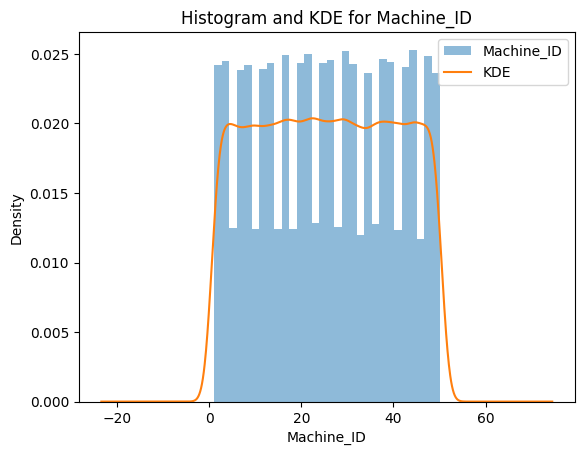

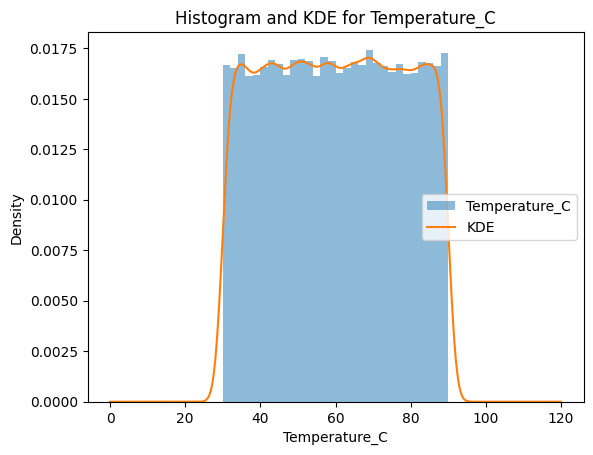

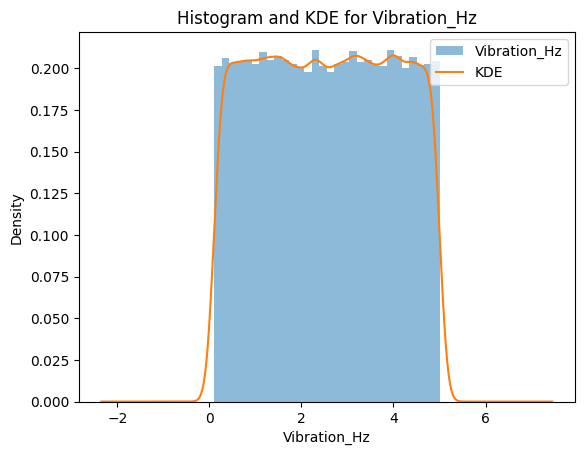

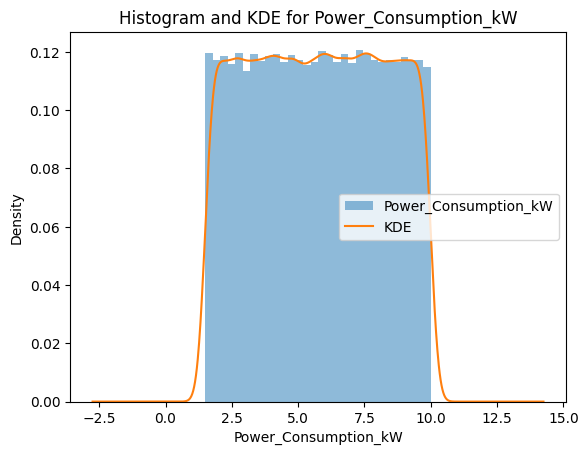

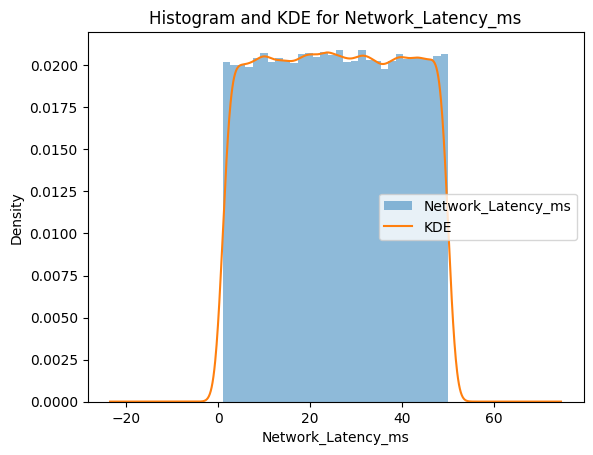

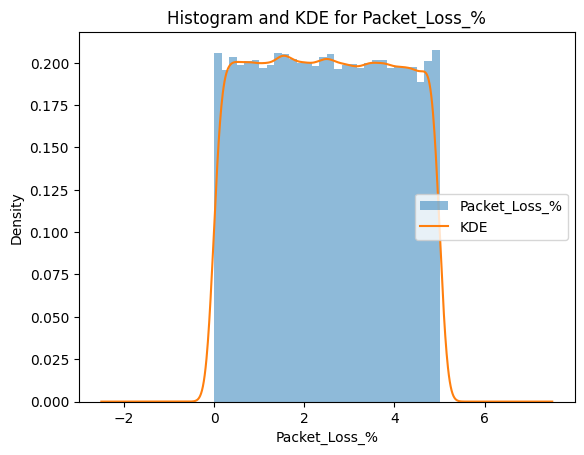

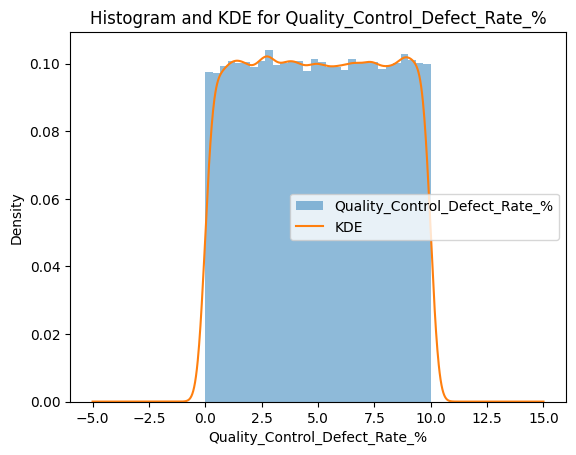

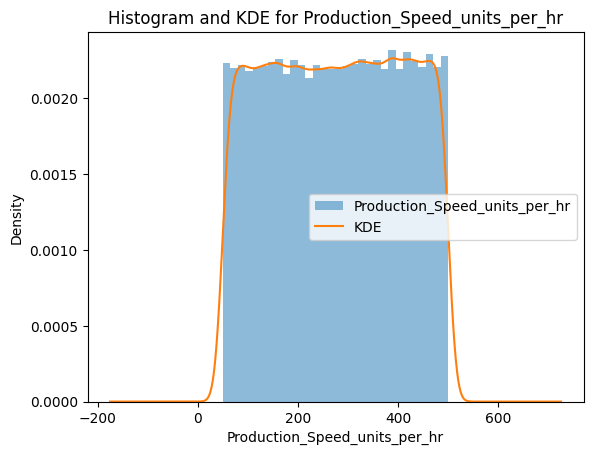

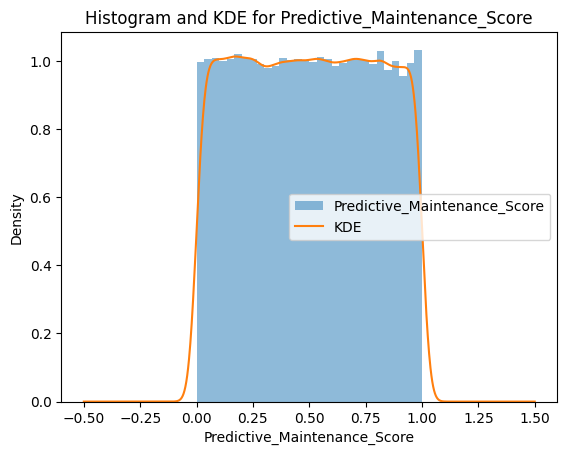

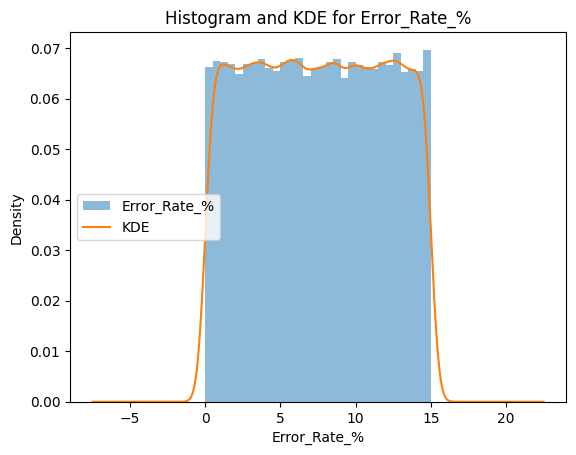

In [10]:
# plot histograms for numerical columns with kde= True
for col in numerical_cols:
    df[col].plot(kind='hist', bins=30, density=True, alpha=0.5, label=col)
    df[col].plot(kind='kde', label='KDE')
    plt.title(f'Histogram and KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

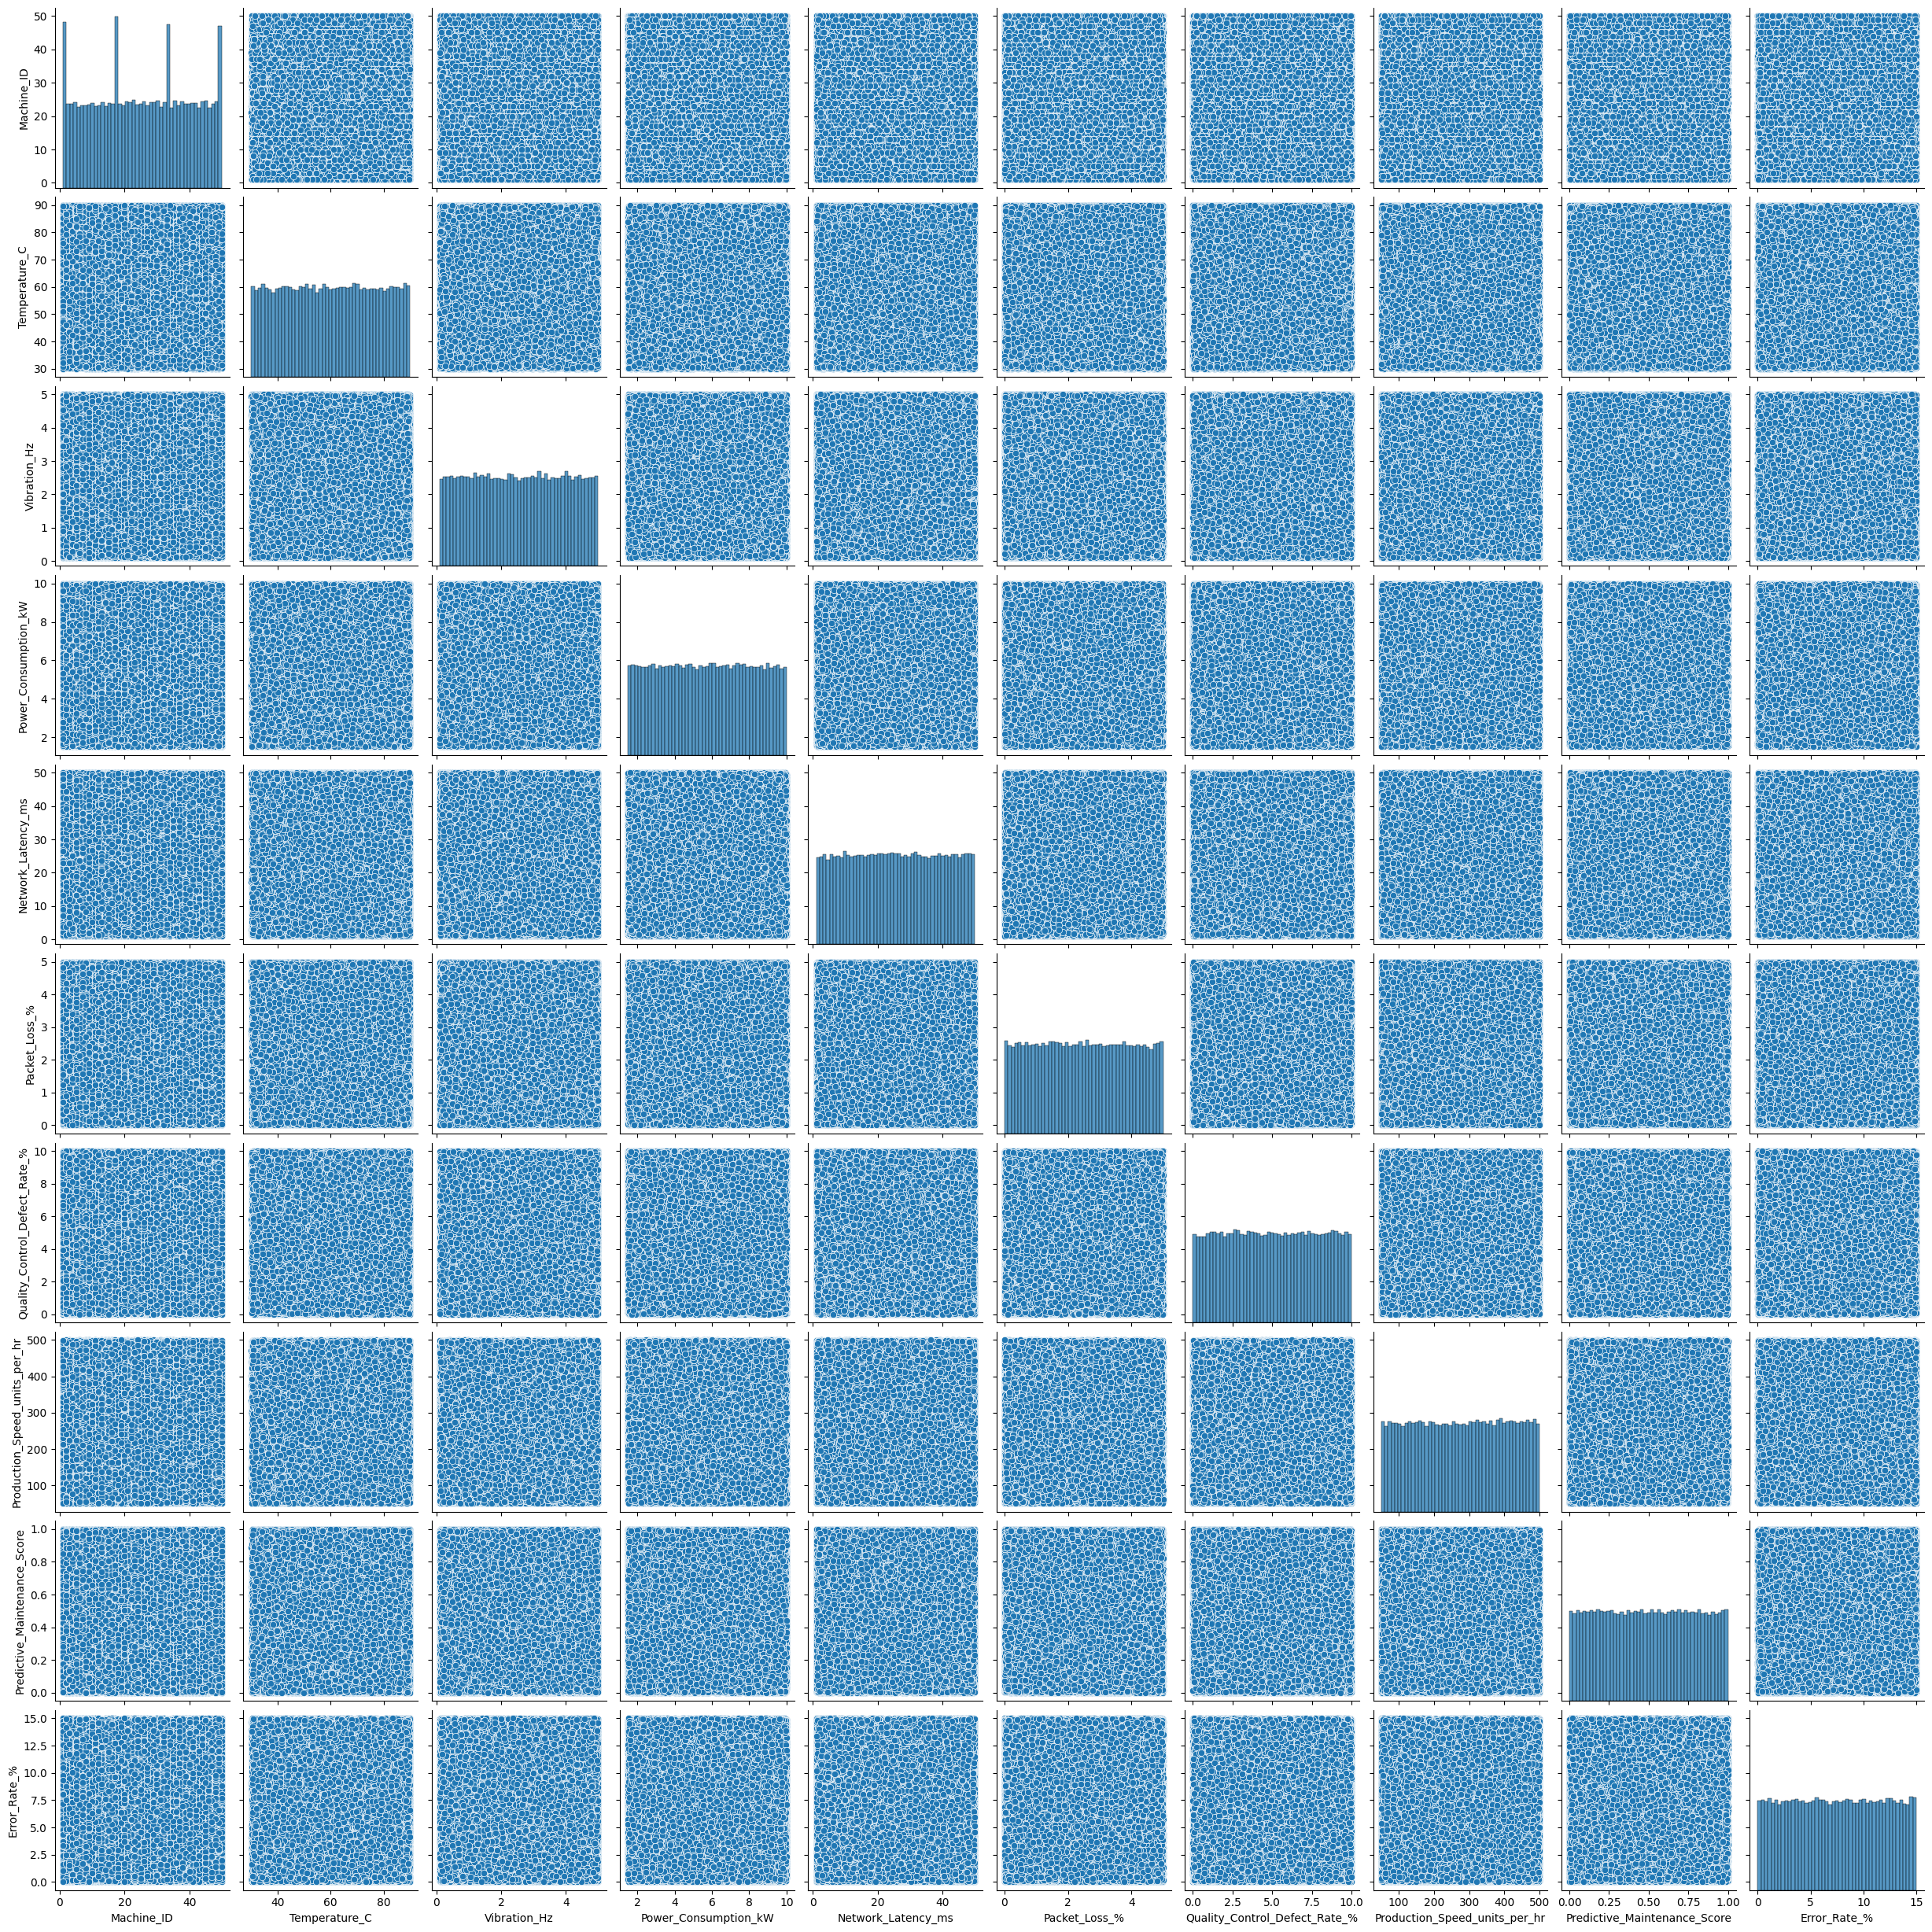

In [11]:
# pairplot for numerical columns
sns.pairplot(df[numerical_cols])
plt.show()

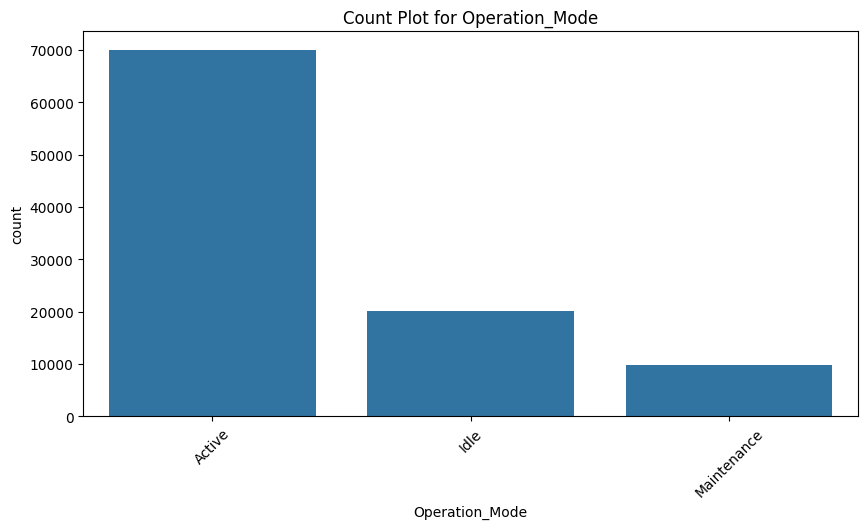

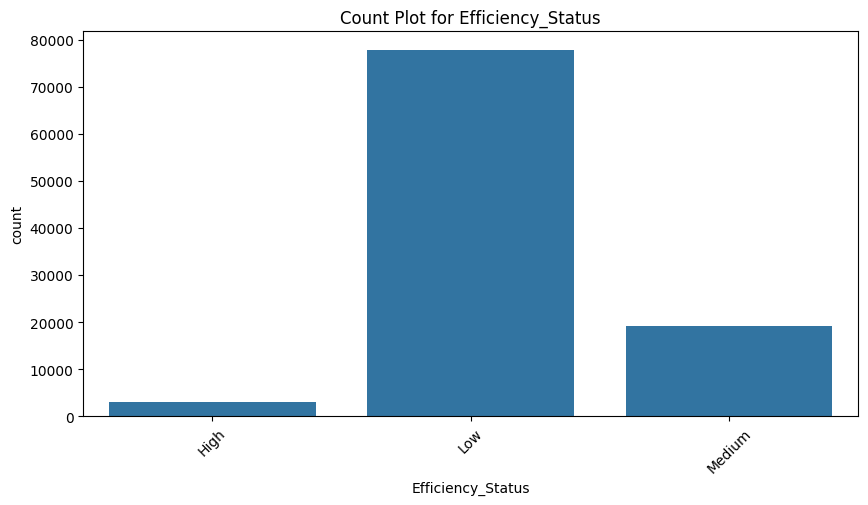

In [12]:
# countplot for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

#### Feature Engineering

In [13]:
# extract year, month, day from 'Timestamp'
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

In [14]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  Year  Month  \
0                      0.344650     14.965470               Low  2024      1   
1                      0.769848      7.678270               Low  2024      1   
2                      0.987086      8.198391               Low  2024      1   
3                      0.983390      2.740847            Medium  2024      1   
4                      0.573117     12.100686               Low  2024      1   

   Day  Hour  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0

In [15]:
# label encoding for categorical columns    
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
print(df[categorical_cols].head())

   Operation_Mode  Efficiency_Status
0               1                  1
1               0                  1
2               0                  1
3               0                  2
4               1                  1


In [16]:
df.head()

Timestamp  Machine_ID  Operation_Mode  Temperature_C  \
0 2024-01-01 00:00:00          39               1      74.137590   
1 2024-01-01 00:01:00          29               0      84.264558   
2 2024-01-01 00:02:00          15               0      44.280102   
3 2024-01-01 00:03:00          43               0      40.568502   
4 2024-01-01 00:04:00           8               1      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_%  Efficiency_Status  Year  Month  \
0                      0.344650     14.965470                  1  2024      1   
1                      0.769848      7.678270                  1  2024      1   
2                      0.987086      8.198391                  1  2024      1   
3                      0.983390      2.740847                  2  2024      1   
4                      0.573117     12.100686                  1  2024      1   

   Day  Hour  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0

In [17]:
# drop 'Timestamp' column and Machine_ID column
df.drop(columns=['Timestamp', 'Machine_ID'], inplace=True)
print(df.head())

   Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0               1      74.137590      3.500595              8.612162   
1               0      84.264558      3.355928              2.268559   
2               0      44.280102      2.079766              6.144105   
3               0      40.568502      0.298238              4.067825   
4               1      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.3446

In [18]:
# divide the dataset into features and target variable
X = df.drop(columns=['Efficiency_Status'])
y = df['Efficiency_Status']
print(X.shape, y.shape)

(100000, 14) (100000,)


In [19]:
# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[ 0.90966411  0.81371637  0.6722461   1.16929055 -1.05554901 -1.58366838
   0.95103527  1.55070634 -0.53576287  1.72084542  0.         -0.98913588
  -1.47971264 -1.65455063]
 [-0.60228488  1.39830797  0.56994397 -1.41860629  0.2518426  -0.18358007
  -0.00680865  0.93975368  0.93646798  0.04016955  0.         -0.98913588
  -1.47971264 -1.65455063]
 [-0.60228488 -0.90984353 -0.33249858  0.16243749 -0.50977173 -0.59171517
  -1.57855052 -1.29013232  1.68864505  0.1601271   0.         -0.98913588
  -1.47971264 -1.65455063]
 [-0.60228488 -1.12410014 -1.59231304 -0.68458872  0.25480412 -0.92318262
  -0.14767135  0.41248759  1.6758475  -1.09856801  0.         -0.98913588
  -1.47971264 -1.65455063]
 [ 0.90966411  0.86718398 -1.55867208  0.19573942  0.60008204  1.59575703
  -0.94362648 -0.8978184   0.25529347  1.06012896  0.         -0.98913588
  -1.47971264 -1.65455063]]


In [20]:
# train-test split
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75000, 14) (25000, 14) (75000,) (25000,)


Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00     19351
           2       1.00      1.00      1.00      4871

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Confusion Matrix:
 [[  777     0     1]
 [    0 19351     0]
 [    0     0  4871]]
Logistic Regression Accuracy: 0.9147
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       778
           1       0.94      0.96      0.95     19351
           2       0.79      0.76      0.78      4871

    accuracy                           0.91     25000
   macro avg       0.88      0.85      0.86     25000
weighted avg       0.91      0.91      0.91     25000

Confusion Matrix:
 [[  647     0   131]
 [    0 18527   824]
 [   75  1103  3693]]
SVM 

c:\Users\faheem\miniconda3\envs\rain\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:07:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9993
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       778
           1       1.00      1.00      1.00     19351
           2       1.00      1.00      1.00      4871

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Confusion Matrix:
 [[  772     0     6]
 [    0 19347     4]
 [    1     6  4864]]
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2360
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 13
[LightGBM] [Info] Start training from score -3.525401
[LightGBM] [Info] Start training from score -0.248906
[LightGBM] [Info] Start training from score -1.655

c:\Users\faheem\miniconda3\envs\rain\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy: 0.9990
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       778
           1       1.00      1.00      1.00     19351
           2       1.00      1.00      1.00      4871

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Confusion Matrix:
 [[  776     0     2]
 [    0 19342     9]
 [    4     9  4858]]


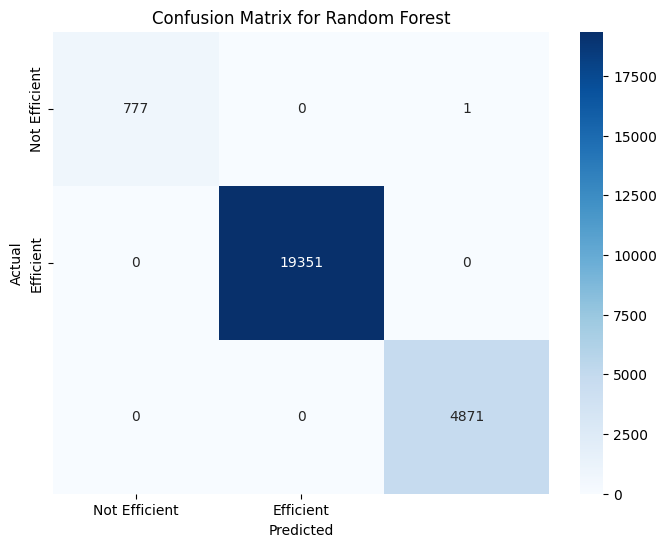

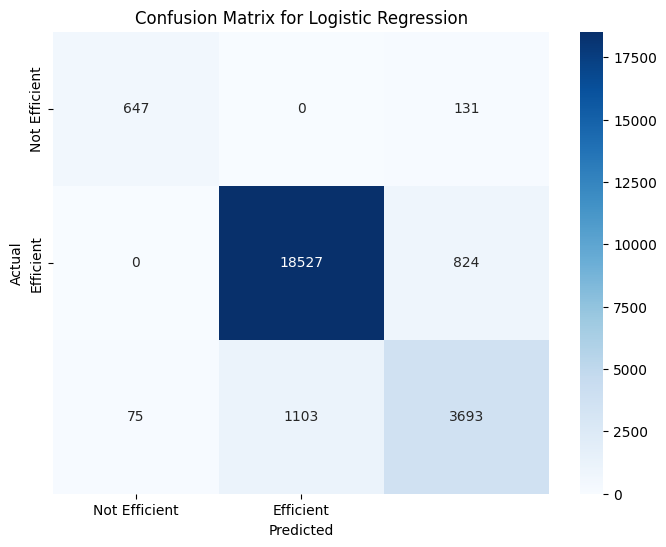

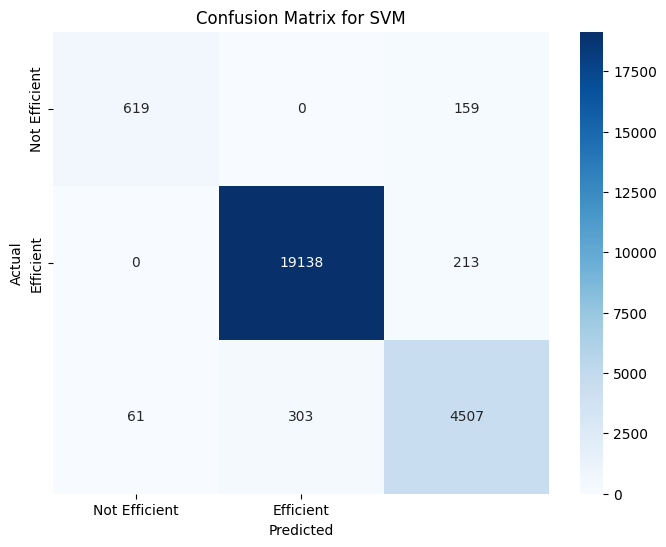

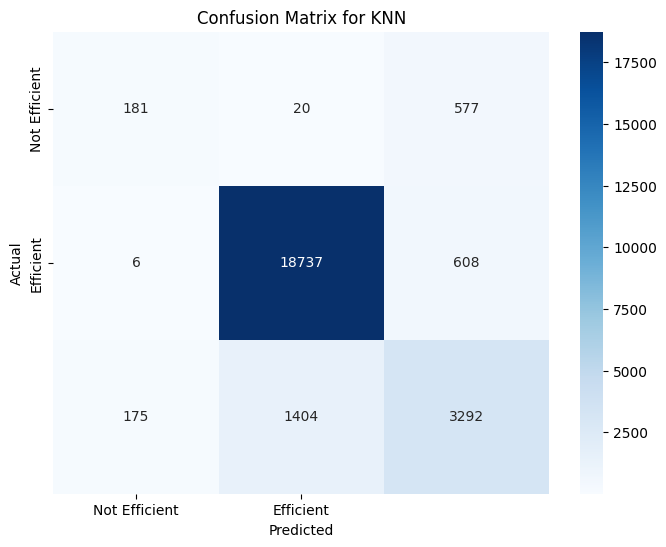

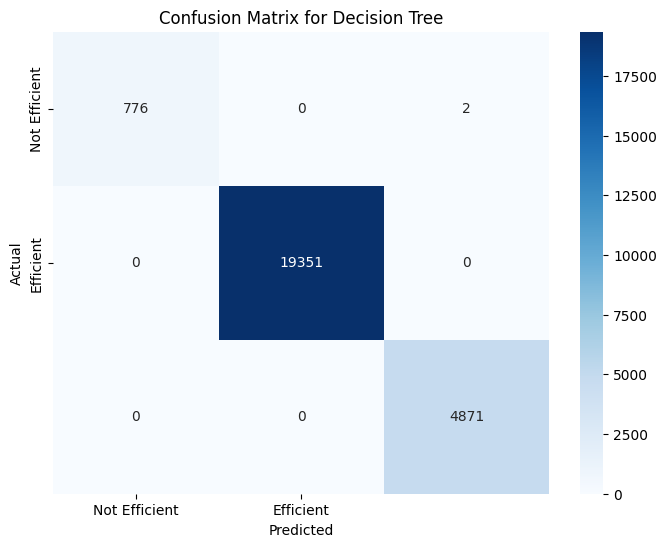

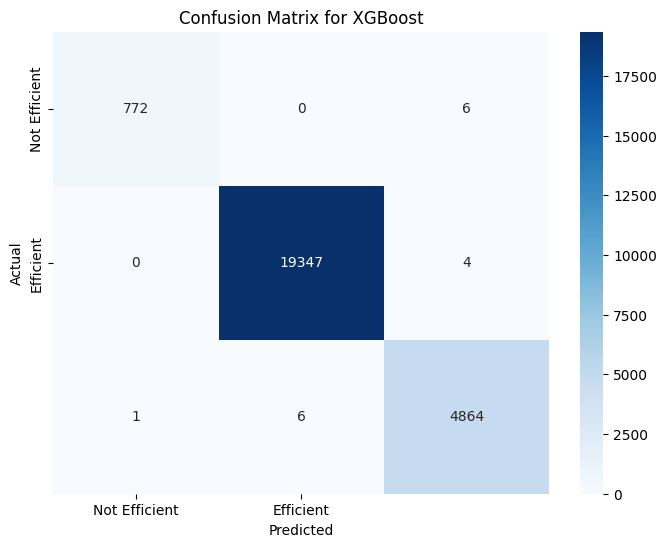

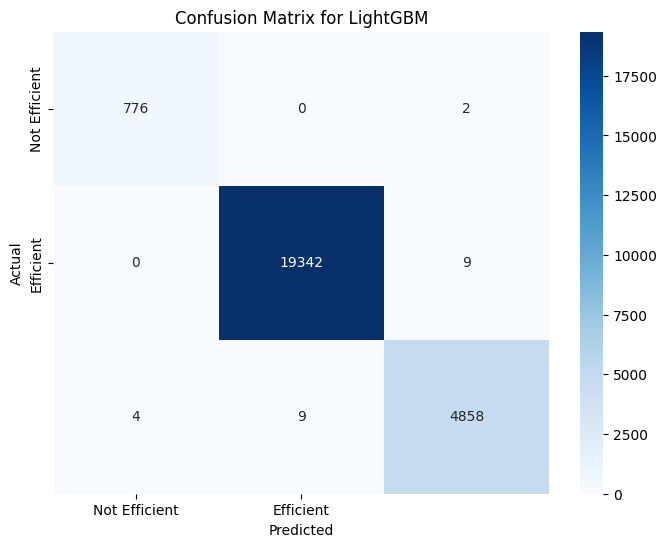

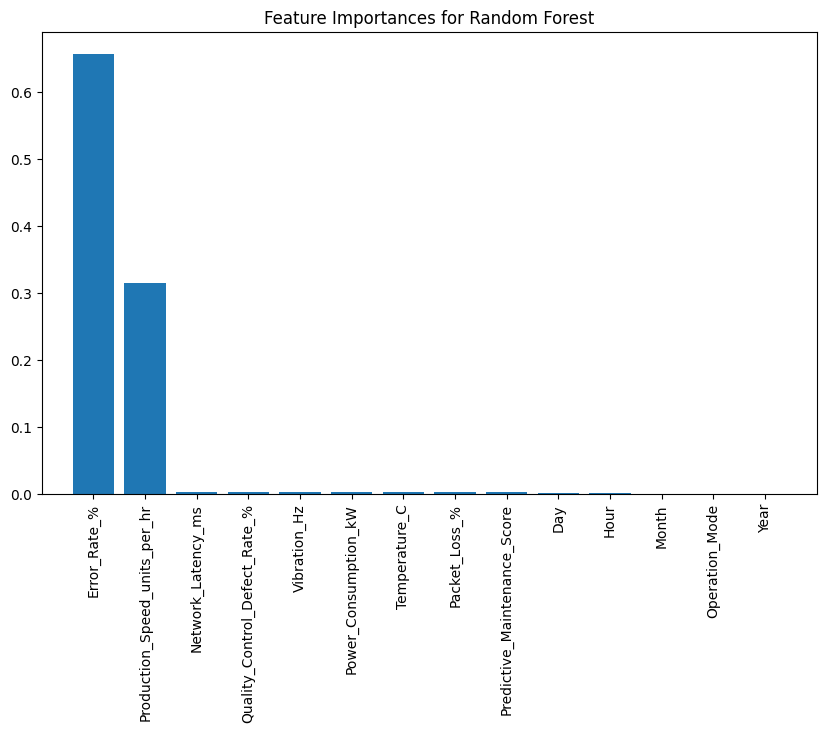

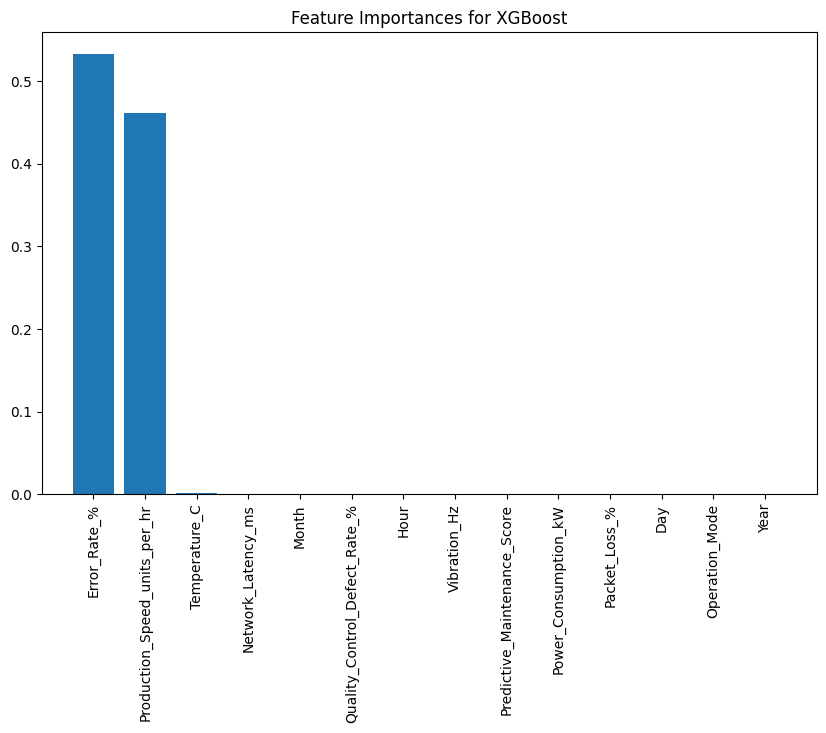

In [21]:
# model training and evaluation with Random Forest Classifier, logistic regression, lightGBM, XGBoost , svm , knn and decision tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}
results = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(results[name]['classification_report'])
    print("Confusion Matrix:\n", results[name]['confusion_matrix'])
# plot confusion matrix for each model
for name, result in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Efficient', 'Efficient'], 
                yticklabels=['Not Efficient', 'Efficient'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
# feature importance for Random Forest and XGBoost
for name in ['Random Forest', 'XGBoost']:
    model = models[name]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = model.coef_[0]
    
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {name}')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

#### Might be data leakage issue we have to find 

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", scores.mean(), "+/-", scores.std())

Cross-validation accuracy: 0.9999600000000001 +/- 3.741657386773529e-05


In [23]:
import pandas as pd

correlations = df.corr()['Efficiency_Status'].sort_values(ascending=False)
print(correlations)

Efficiency_Status                1.000000
Production_Speed_units_per_hr    0.103402
Power_Consumption_kW             0.003622
Temperature_C                    0.002075
Network_Latency_ms               0.001389
Vibration_Hz                     0.000558
Day                              0.000382
Month                            0.000078
Operation_Mode                  -0.000495
Predictive_Maintenance_Score    -0.000562
Hour                            -0.000670
Quality_Control_Defect_Rate_%   -0.001128
Packet_Loss_%                   -0.003655
Error_Rate_%                    -0.376397
Year                                  NaN
Name: Efficiency_Status, dtype: float64


In [24]:
importances = models['Random Forest'].feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance}")

Operation_Mode: 0.0005777538100449283
Temperature_C: 0.0033931672268170347
Vibration_Hz: 0.003412898546193748
Power_Consumption_kW: 0.003396787353193255
Network_Latency_ms: 0.0034884652225622387
Packet_Loss_%: 0.0033880897968240247
Quality_Control_Defect_Rate_%: 0.0034559026908923636
Production_Speed_units_per_hr: 0.31442566717760184
Predictive_Maintenance_Score: 0.0033211487612028905
Error_Rate_%: 0.656175194151782
Year: 0.0
Month: 0.0006586323350738238
Day: 0.0022192120994378316
Hour: 0.002087080828373916


In [25]:
## Data leakage issue is find

In [26]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming 'data' is your DataFrame
X = df.drop(columns=['Efficiency_Status', 'Error_Rate_%', 'Production_Speed_units_per_hr', 'Year'])  # Also remove Year as it has no importance
y = df['Efficiency_Status']

rf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy without suspicious features:", scores.mean(), "+/-", scores.std())

Cross-validation accuracy without suspicious features: 0.77382 +/- 0.008835190999633232


In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Dictionary to store results
results = {}

# Function to evaluate a model
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix,
        'cv_accuracy': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Cross-validation Accuracy: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", conf_matrix)

# Initialize models with class weights for imbalance where applicable
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'SVM': SVC(class_weight='balanced', random_state=42),  # Note: SVM may be slow on 100,000 samples
    'KNN': KNeighborsClassifier(),  # KNN doesn't support class weights, we'll use SMOTE later if needed
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42),  # XGBoost handles imbalance internally
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    evaluate_model(model, model_name, X_train, X_test, y_train, y_test)

# Determine the best model based on cross-validation accuracy
best_model = max(results, key=lambda x: results[x]['cv_accuracy'])
print(f"\nBest Model Based on Cross-validation Accuracy: {best_model}")
print(f"Cross-validation Accuracy: {results[best_model]['cv_accuracy']:.4f} +/- {results[best_model]['cv_std']:.4f}")


Random Forest Results:
Test Accuracy: 0.9999
Cross-validation Accuracy: 0.7782 +/- 0.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00     19351
           2       1.00      1.00      1.00      4871

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

Confusion Matrix:
 [[  776     0     2]
 [    0 19351     0]
 [    0     0  4871]]

Logistic Regression Results:
Test Accuracy: 0.8824
Cross-validation Accuracy: 0.3709 +/- 0.1652
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80       778
           1       0.98      0.89      0.93     19351
           2       0.65      0.85      0.74      4871

    accuracy                           0.88     25000
   macro avg       0.77     

In [28]:

# Prepare data
X = df.drop(columns=['Efficiency_Status', 'Error_Rate_%', 'Production_Speed_units_per_hr', 'Year'])
y = df['Efficiency_Status']

# Models
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Cross-validation with macro F1-score
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    print(f"{model_name} Cross-validation Macro F1-score: {cv_scores.mean():.4f} +/- {cv_scores.std():.4f}")

Random Forest Cross-validation Macro F1-score: 0.2918 +/- 0.0000
KNN Cross-validation Macro F1-score: 0.3149 +/- 0.0025
XGBoost Cross-validation Macro F1-score: 0.3000 +/- 0.0092


In [29]:
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")
if duplicates > 0:
    data = df.drop_duplicates()

Number of duplicated rows: 0


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Retrain and evaluate KNN (best model)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN Test Accuracy (Recomputed):", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

KNN Test Accuracy (Recomputed): 0.7448
Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.01      0.01       747
           1       0.78      0.94      0.85     19456
           2       0.20      0.05      0.08      4797

    accuracy                           0.74     25000
   macro avg       0.34      0.33      0.32     25000
weighted avg       0.64      0.74      0.68     25000

Confusion Matrix:
 [[    4   706    37]
 [   78 18360  1018]
 [   25  4516   256]]


In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Prepare data
X = df.drop(columns=['Efficiency_Status', 'Error_Rate_%', 'Production_Speed_units_per_hr', 'Year'])
y = df['Efficiency_Status']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recompute cross-validation for KNN and XGBoost
models = {
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42)
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1_macro')
    print(f"{model_name} Cross-validation Macro F1-score with SMOTE:", cv_scores.mean(), "+/-", cv_scores.std())

KNN Cross-validation Macro F1-score with SMOTE: 0.706172649528499 +/- 0.02070608373776874
XGBoost Cross-validation Macro F1-score with SMOTE: 0.3569969864756798 +/- 0.01711949806278673


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation macro F1-score:", grid_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation macro F1-score: 0.7529535667828344


In [36]:
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

# Prepare data
X = df.drop(columns=['Efficiency_Status', 'Error_Rate_%', 'Production_Speed_units_per_hr', 'Year'])
y = df['Efficiency_Status']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train final KNN model with best parameters
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
knn.fit(X_resampled, y_resampled)

# # Save the model
# joblib.dump(knn, 'models/knn_model_final_tuned.pkl')

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')